# PQ penny flip basic circuit

In [1]:
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
theta=np.pi/4
Q1=np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
Q2=np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
q=QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.squ(Q1, q)
circuit.x(q)
circuit.squ(Q2, q)
circuit.draw()

┌─────────┐┌───┐┌─────────┐
q0_0: ┤ UNITARY ├┤ X ├┤ UNITARY ├
      └─────────┘└───┘└─────────┘
c0: 1/═══════════════════════════

# PQ penny flip with asymetric strategy

We find in following graph that no matter what strategy P use, Q always win 


Text(0.5, 0, 'mix strategy P use')

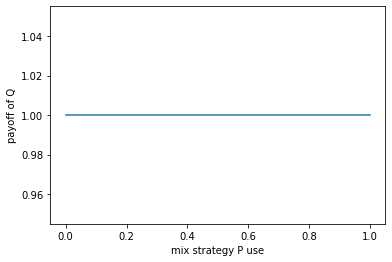

In [2]:
# Q can use quantum strategy
# P can only use classicalstrategy
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
theta=np.pi/4
Q1=np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
Q2=np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
p_list=[]
payoff_list=[]
for j in range(11):
    p=j/10
    p_list.append(p)
    payoff=0
    for i in range(100):
        q=QuantumRegister(1)
        c = ClassicalRegister(1)
        circuit = QuantumCircuit(q,c)
        circuit.squ(Q1, q)
        j=random.uniform(0, 1)
        if j<p:
            pass
        else:
            circuit.x(q)
        circuit.squ(Q2, q)
        circuit.draw()
        circuit.measure(q,c)
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array([[1,-1],[-1,1]])
        for k in answer:
            if (k=="0"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="1"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
    payoff_list.append(payoff[0]/100)
print("We find in following graph that no matter what strategy P use, Q always win ")
import matplotlib.pyplot as plt
plt.plot(p_list,payoff_list)
plt.ylabel('payoff of Q')
plt.xlabel('mix strategy P use')

# PQ penny flip with both quantum strategy

In [3]:
# find P best response
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
max_payoff_list=[]
max_theta_list=[]
max_theta2_list=[]
for i in range(11):
    for l in range(11):
        max_payoff=0
        for j in range(11):
            payoff=0
            q=QuantumRegister(1)
            c = ClassicalRegister(1)
            circuit = QuantumCircuit(q,c)
            theta=pi/10*i
            theta1=pi/10*l
            theta2=pi/10*j
            Q1=np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
            Q2=np.array([[np.cos(theta1),np.sin(theta1)],[np.sin(theta1),-np.cos(theta1)]])
            P=np.array([[np.cos(theta2),np.sin(theta2)],[np.sin(theta2),-np.cos(theta2)]])
            circuit.squ(Q1, q)
            circuit.squ(P, q)
            circuit.squ(Q2, q)
            circuit.draw()
            circuit.measure(q,c)
            backend = Aer.get_backend('qasm_simulator')
            shots = 1024
            results = execute(circuit, backend=backend, shots=shots).result()
            answer = results.get_counts()
            payoff_matrix=np.array([[1,-1],[-1,1]])
            for k in answer:
                if (k=="0"):
                    payoff=payoff+payoff_matrix[0]*answer[k]/shots
                if (k=="1"):
                    payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if payoff[0]>max_payoff:
                max_payoff=payoff[0]
                index=j
        max_payoff_list.append(max_payoff)  
        max_theta_list.append((i,l))
        max_theta2_list.append(index)
print("we can see that the best response of P can always achieve payoff=1")
print("P best response:",max_payoff_list)

we can see that the best response of P can always achieve payoff=1
P best response: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [4]:
# find Q best response
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
max_payoff_list_2=[]
max_theta_list_2=[]
max_theta2_list_2=[]
for i in range(11):
    max_payoff=0
    for l in range(11):
        for j in range(11):
            payoff=0
            q=QuantumRegister(1)
            c = ClassicalRegister(1)
            circuit = QuantumCircuit(q,c)
            theta=pi/10*l
            theta1=pi/10*j
            theta2=pi/10*i
            Q1=np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
            Q2=np.array([[np.cos(theta1),np.sin(theta1)],[np.sin(theta1),-np.cos(theta1)]])
            P=np.array([[np.cos(theta2),np.sin(theta2)],[np.sin(theta2),-np.cos(theta2)]])
            circuit.squ(Q1, q)
            circuit.squ(P, q)
            circuit.squ(Q2, q)
            circuit.draw()
            circuit.measure(q,c)
            backend = Aer.get_backend('qasm_simulator')
            shots = 1024
            results = execute(circuit, backend=backend, shots=shots).result()
            answer = results.get_counts()
            payoff_matrix=np.array([[1,-1],[-1,1]])
            for k in answer:
                if (k=="0"):
                    payoff=payoff+payoff_matrix[0]*answer[k]/shots
                if (k=="1"):
                    payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if payoff[1]>max_payoff:
                max_payoff=payoff[1]
                index=(l,j)
    max_payoff_list_2.append(max_payoff)
    max_theta2_list_2.append(i)
    max_theta_list_2.append(index)
print("we can see that the best response of Q can always achieve payoff=1")
print("Q best response:",max_payoff_list_2)

we can see that the best response of Q can always achieve payoff=1
Q best response: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [6]:
NE=[]
NE_theta=[]
NE_theta2=[]

for i in range(len(max_payoff_list_2)):
    for s in range(len(max_payoff_list)):
        if (max_theta_list_2[i]==max_theta_list[s] and max_theta2_list[s]==i):
            NE.append((max_payoff_list[s],max_payoff_list_2[i]))
            NE_theta.append(max_theta_list[s])
            NE_theta2.append(i)
print("no pure strategy Nash Equilibrium:",NE)

no pure strategy Nash Equilibrium: []
